# This is our Jupyter notebook

## Crimes worth 2 points
1. Criminal Homicide
2. Forcible Rape
3. Robbery
4. Aggravated Assault
5. Burglary 
6. Larceny-theft (except motor vehicle theft)
7. Motor Vehicle Theft
8. Arson
----------------------------------------
## Crimes worth one point
9. Other Assaults
10. Forgery and Counterfeiting
11. Fraud
12. Embezzlement
13. Stolen Property:  Buying, Receiving, Possessing
14. Vandalism
15. Weapons:  Carrying, Possessing, etc.
16. Prostitution and Commercialized Vice
17. Sex Offenses
18. Drug Abuse Violations
19. Gambling
20. Offenses Against the Family and Children
21. Driving Under the Influence
22. Liquor Laws
23. Drunkenness
24. Disorderly Conduct
25. Vagrancy
26. All Other Offenses
27. Suspicion
28. Curfew and Loitering Laws—(Persons under 18)
29. Runaways—(Persons under 18)

In [44]:
import pandas as pd

crimes = pd.read_csv("crime.csv")
census = pd.read_csv("population-density.csv")

scores = { i : 0 for i in census["Neighborhood"].tolist() }


for i in range(len(crimes)):
    try:
        if crimes["HIERARCHY"][i] < 9:
            scores[crimes["INCIDENTNEIGHBORHOOD"][i]] += 2
        else:
            scores[crimes["INCIDENTNEIGHBORHOOD"][i]] += 1
    except:
        pass

big_hoods = scores.copy()
    
for i in range(len(census)):
    scores[census["Neighborhood"][i]] = scores[census["Neighborhood"][i]] / int(census["Pop. 2010"][i])
    big_hoods[census["Neighborhood"][i]] = big_hoods[census["Neighborhood"][i]] / int(census["Pop. 2010"][i])
    
    if int(census["Pop. 2010"][i]) < 100:
        big_hoods.pop(census["Neighborhood"][i])
    
scores = pd.DataFrame.from_dict(scores, orient='index', columns=["CPC"])   
big_hoods = pd.DataFrame.from_dict(big_hoods, orient='index', columns=["CPC"])   
big_hoods

,CPC
Allegheny Center,2.887460
Allegheny West,2.329004
Allentown,1.557600
Arlington,0.871589
Arlington Heights,1.590164
Banksville,0.276303
Bedford Dwellings,1.354409
Beechview,0.460246
Beltzhoover,0.692468
Bloomfield,0.901090


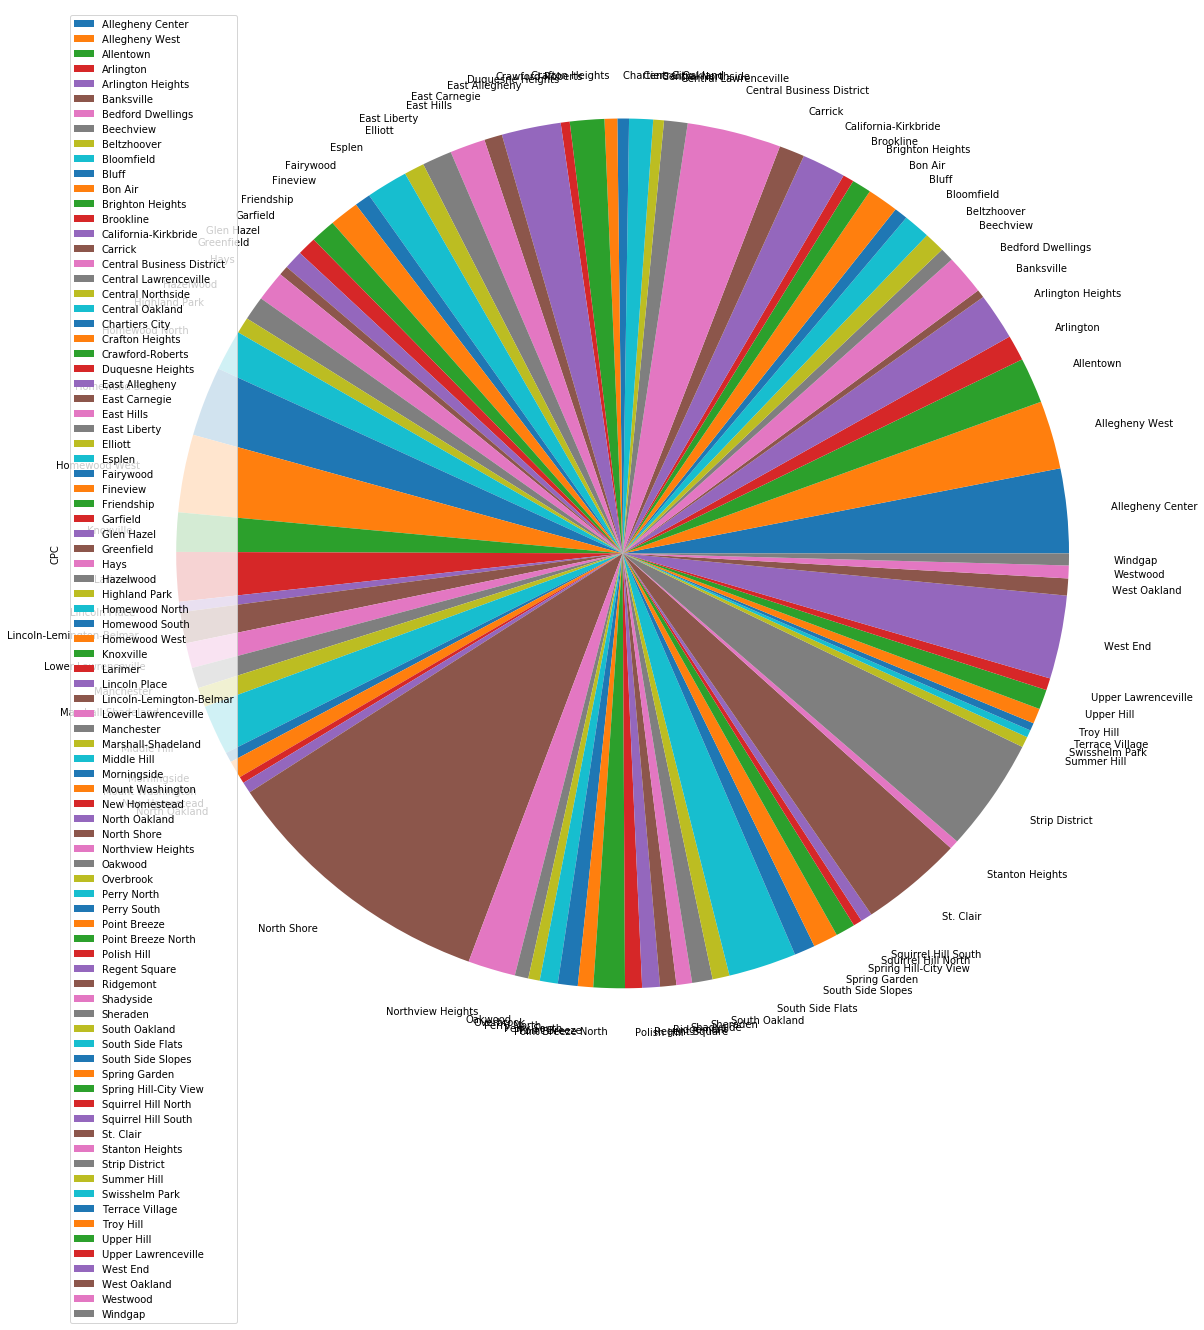

In [45]:
plot = big_hoods.plot.pie(y="CPC",figsize=(20, 20),subplots=True)

In [48]:

big_hoods.sort_values(by=['CPC'])

,CPC
Mt. Oliver,0.000000
New Homestead,0.223232
Swisshelm Park,0.249816
Terrace Village,0.262392
Banksville,0.276303
Squirrel Hill North,0.292352
Duquesne Heights,0.298969
Stanton Heights,0.306020
Greenfield,0.322183
Morningside,0.340705
